In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})

import seaborn as sns
sns.set()

In [7]:
# load data
def load_data(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

def preprocess_data(df):
    df['sun_rounded'] = df[['sun zenith']].apply(lambda row: round(row['sun zenith']), axis='columns')
    num_regions =4
    for i in range(num_regions):
        df[f'region_{i}']=df[['regions']].apply(lambda row: row['regions'][i], axis='columns')
    df.drop(['sun zenith', 'regions'],axis='columns', inplace=True)
    df['year_month'] = df['utc time'].map(lambda x: str(x.strftime('%Y-%m')))
    return df

sun_data_full = load_data("../CloudCT_utils/stary_data_28.07777777777778_days.pkl")
sun_data_clean_full  = preprocess_data(sun_data_full)
sun_data_clean_full

,utc time,stary light angle,sun_rounded,region_0,region_1,region_2,region_3,year_month
0,2021-12-06 10:17:00+00:00,78.165570,56,False,False,True,False,2021-12
1,2021-12-06 10:18:00+00:00,75.574216,54,False,False,True,False,2021-12
2,2021-12-06 10:19:00+00:00,73.014429,53,False,False,True,False,2021-12
3,2021-12-06 10:20:00+00:00,70.493446,51,False,False,True,False,2021-12
4,2021-12-06 10:21:00+00:00,68.019256,50,False,False,True,False,2021-12
...,...,...,...,...,...,...,...,...
1629,2022-01-03 11:08:00+00:00,51.860635,15,False,False,True,False,2022-01
1630,2022-01-03 11:09:00+00:00,48.016864,11,False,False,True,False,2022-01
1631,2022-01-03 11:10:00+00:00,44.174363,8,False,False,True,False,2022-01
1632,2022-01-03 11:11:00+00:00,42.797406,5,False,False,True,False,2022-01


In [8]:
sun_data_clean_full.describe()

,stary light angle,sun_rounded
count,1634.000000,1634.000000
mean,67.295115,41.063647
std,12.631028,18.817481
min,41.644672,1.000000
25%,57.427853,25.000000
50%,67.035536,42.000000
75%,77.329892,58.000000
max,105.246007,70.000000


In [9]:
cols = sun_data_clean_full.select_dtypes(include=['bool', 'object']).columns
for col in cols:
    print(sun_data_clean_full.groupby(by=col).size(),'\n')


region_0
False    716
True     918
dtype: int64 

region_1
False    1394
True      240
dtype: int64 

region_2
False    1123
True      511
dtype: int64 

region_3
False    1605
True       29
dtype: int64 

year_month
2021-12    1452
2022-01     182
dtype: int64 



In [26]:
def plot_all_time_all_regions(df,bins=10):
    fig,axs = plt.subplots(1,1,figsize=(14,12))
#     df[["sun_rounded"]].hist(ax=axs,bins=bins)

    sns.distplot(df["stary light angle"],ax=axs, label = 'stary light angle')
    sns.distplot(df["sun_rounded"],ax=axs, label = 'SZA')
    axs.set_title('Full Time Range, all regions, Histograms')
    axs.legend(fontsize='x-large', title_fontsize='40')


    
def plot_all_time_per_region__2by2(df, do_distplot=True):
    
    fig, axs = plt.subplots(2,2, figsize=(16,14))
    region_id = 0
    fig.suptitle('Full Time Range, per Region, Sun Zenith Histogram', y=0.95)
    for i in range(2):
        for j in range(2):
            
            input_data = df[["sun_rounded"]].where(df[f'region_{region_id}']==True)
            
            if do_distplot:
                sns.distplot(input_data,ax=axs[i][j])
            else:
                input_data.hist(ax=axs[i][j])
                
            axs[i][j].set_title(f'Region {region_id}')
            region_id +=1

def plot_all_time_per_region__1by1(df, do_distplot=True):
    
    fig, axs = plt.subplots(1,1, figsize=(16,14))
    region_id = 0
    fig.suptitle('Full Time Range, per Region, Sun Zenith Histogram', y=0.9)
    
    for i in range(2):
        for j in range(2):
            
            input_data = df[["sun_rounded"]].where(df[f'region_{region_id}']==True)
            if do_distplot:
                sns.distplot(input_data,ax=axs, kde_kws={"label": f'Region {region_id}'})
            else:
                input_data.hist(ax=axs, alpha=0.5)
            region_id +=1


/home/vhold/.conda/envs/pyshdom/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/vhold/.conda/envs/pyshdom/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


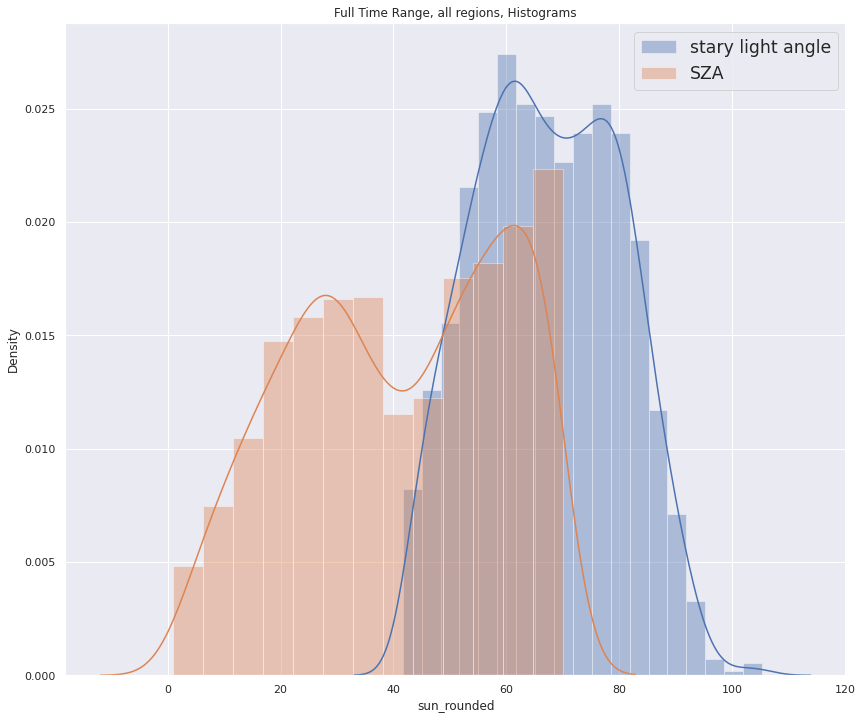

In [27]:
plot_all_time_all_regions(sun_data_clean_full,bins=20)

/home/vhold/.conda/envs/pyshdom/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/vhold/.conda/envs/pyshdom/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/vhold/.conda/envs/pyshdom/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

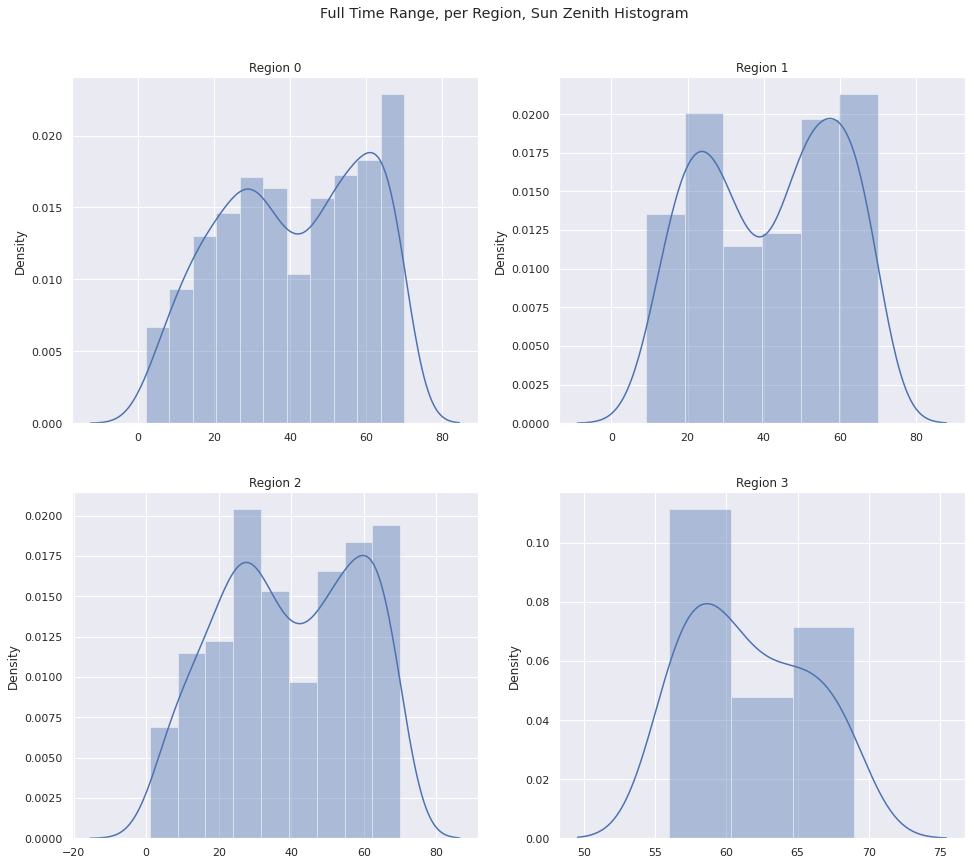

In [12]:
plot_all_time_per_region__2by2(sun_data_clean_full)

# Sun Zenith Histogram - per year-month, per Region

/home/vhold/.conda/envs/pyshdom/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/vhold/.conda/envs/pyshdom/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/vhold/.conda/envs/pyshdom/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

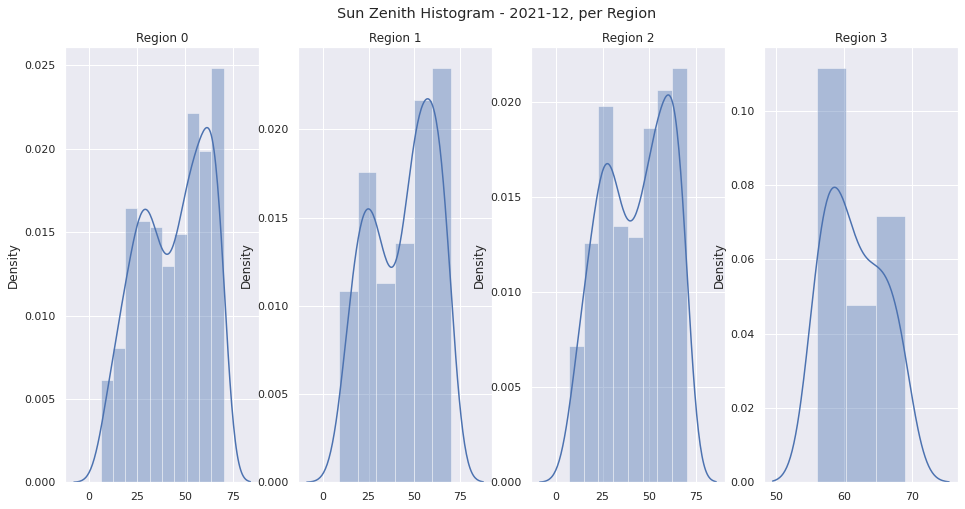

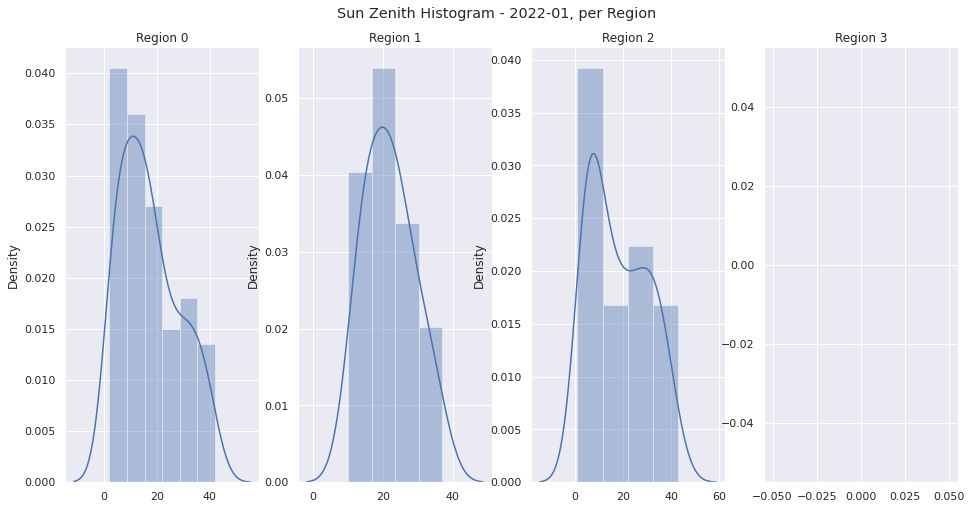

In [13]:
def plot_per_time_per_region__1by4(df, year_month, do_distplot=True):
    
    fig, axs = plt.subplots(1,4, figsize=(16,8))
    fig.suptitle(f'Sun Zenith Histogram - {year_month}, per Region', y=0.95)
    for region_id in range(4):            
            input_data = df[["sun_rounded"]][(df['year_month']==year_month)&(df[f'region_{region_id}']==True)]
            if do_distplot:
                sns.distplot(input_data,ax=axs[region_id])
            else:
                input_data.hist(ax=axs[region_id])
                
            axs[region_id].set_title(f'Region {region_id}')
            
year_months = sun_data_clean_full['year_month'].unique()

for year_month in year_months:
    plot_per_time_per_region__1by4(sun_data_clean_full, year_month=year_month)